In [1]:
import numpy as np
from UZ_utils import *
import cv2
from matplotlib import pyplot as plt
import os

# Exercise 1

### a

In [2]:
def myhist3(arr, n):
    min = np.min(arr)
    max = np.max(arr)
    diff = max - min
    shape = arr.shape
    arr = arr.reshape((shape[0] * shape[1], 3)) # reshaping into one dimensional image with 3 channels (2D (w*h)*3)
    arr = ((arr.astype(np.float64) - min) / diff) * (n)
    arr = arr.astype(np.uint8)
    arr[arr == n] = n-1 # max value is n (n goes into n-1 bin)
    counts = np.zeros((n, n, n))
    for pixel in arr:
        counts[pixel[2], pixel[1], pixel[0]] += 1
    
    return counts / len(arr) # normalizing

### b 

In [3]:
def compare_histograms(hist1, hist2, method):
    hist1 = hist1.reshape(-1) # turn histograms in 1D array
    hist2 = hist2.reshape(-1)
    if method == "L2":
        # print("L2")
        return np.sqrt(np.sum((hist1 - hist2) * (hist1 - hist2)))
    elif method == "x^2":
        # print("x^2")
        return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1.0e-10))
    elif method == "I":
        # print("I")
        return 1 - np.sum(np.minimum(hist1, hist2))
    elif method == "H":
        # print("H")
        return np.sqrt(0.5 * np.sum((np.sqrt(hist1) - np.sqrt(hist2)) ** 2))
    else:
        print("Method not implemented")

### c

In [4]:
obj1_1 = cv2.imread('dataset/object_01_1.png') # 0-255
obj1_1 = cv2.cvtColor(obj1_1, cv2.COLOR_BGR2RGB)
obj2_1 = cv2.imread('dataset/object_02_1.png') # 0-255
obj2_1 = cv2.cvtColor(obj2_1, cv2.COLOR_BGR2RGB)
obj3_1 = cv2.imread('dataset/object_03_1.png') # 0-255
obj3_1 = cv2.cvtColor(obj3_1, cv2.COLOR_BGR2RGB)

n_bins = 8
hist1 = myhist3(obj1_1, n_bins)
hist2 = myhist3(obj2_1, n_bins)
hist3 = myhist3(obj3_1, n_bins)
hist1 = hist1.reshape(-1)
hist2 = hist2.reshape(-1)
hist3 = hist3.reshape(-1)

In [5]:
print("L2")
value1 = compare_histograms(hist1, hist1, "L2")
print(value1)
value2 = compare_histograms(hist1, hist2, "L2")
print(value2)
value3 = compare_histograms(hist1, hist3, "L2")
print(value3)
print("x^2")
value1 = compare_histograms(hist1, hist1, "x^2")
print(value1)
value2 = compare_histograms(hist1, hist2, "x^2")
print(value2)
value3 = compare_histograms(hist1, hist3, "x^2")
print(value3)
print("I")
value1 = compare_histograms(hist1, hist1, "I")
print(value1)
value2 = compare_histograms(hist1, hist2, "I")
print(value2)
value3 = compare_histograms(hist1, hist3, "I")
print(value3)
print("H")
value1 = compare_histograms(hist1, hist1, "H")
print(value1)
value2 = compare_histograms(hist1, hist2, "H")
print(value2)
value3 = compare_histograms(hist1, hist3, "H")
print(value3)


L2
0.0
0.4262689894140761
0.09658762854854758
x^2
0.0
0.43437126020805145
0.13341953397709233
I
0.0
0.60333251953125
0.2022705078125
H
0.0
0.5718800006358132
0.3212026924857104


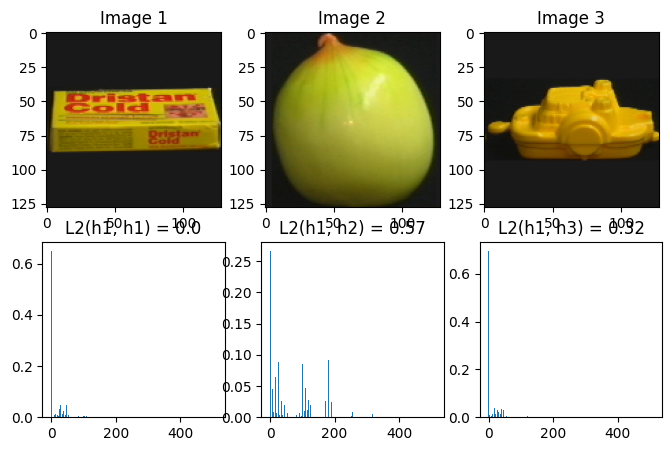

In [6]:
f = plt.figure(figsize=(8, 5))
f.add_subplot(2, 3, 1)
plt.imshow(obj1_1)
plt.title("Image 1")
f.add_subplot(2, 3, 2)
plt.imshow(obj2_1)
plt.title("Image 2")
f.add_subplot(2, 3, 3)
plt.imshow(obj3_1)
plt.title("Image 3")
f.add_subplot(2, 3, 4)
plt.bar(np.arange(n_bins**3), hist1, width=3)
plt.title(f"L2(h1, h1) = {np.round(value1, 2)}")
f.add_subplot(2, 3, 5)
plt.bar(np.arange(n_bins**3), hist2, width=3)
plt.title(f"L2(h1, h2) = {np.round(value2, 2)}")
f.add_subplot(2, 3, 6)
plt.bar(np.arange(n_bins**3), hist3, width=3)
plt.title(f"L2(h1, h3) = {np.round(value3, 2)}")
plt.show()


Question: Which image (object_02_1.png or object_03_1.png) is more similar
to image object_01_1.png considering the L2 distance? How about the other three
distances? We can see that all three histograms contain a strongly expressed component (one bin has a much higher value than the others). Which color does this
bin represent

Answer: Image object_03_1.png is more simmilar to object01_1.png considering L2 distance. And also for other 3 distances. Black.

### d

In [35]:
def calculateHistogramsInFolder(path, n_bins):
    files = os.listdir(path)
    histograms = {}
    for f in files:
        temp = cv2.imread(f'{path}/{f}') # 0-255
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        tempHist = myhist3(temp, n_bins)
        tempHist = tempHist.reshape(-1)
        histograms[f] = tempHist
    return histograms

n_bins = 8
histograms = calculateHistogramsInFolder("dataset", n_bins)

In [36]:

imageToCompare = cv2.imread('dataset/object_05_4.png') # 0-255
imageToCompare = cv2.cvtColor(imageToCompare, cv2.COLOR_BGR2RGB)
imageToCompareHist = myhist3(imageToCompare, n_bins)
imageToCompareHist = imageToCompareHist.reshape(-1)


In [37]:
def display1d(sortedHistograms, comparingMathod):
    f = plt.figure(figsize=(8, 5))
    for i, data in enumerate(sortedHistograms):
        if i == 6:
            break
        value = compare_histograms(imageToCompareHist, data[1], comparingMathod)
        print(data[0], value)
        temp = cv2.imread(f'dataset/{data[0]}') # 0-255
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        f.add_subplot(2, 6, 1+i)
        plt.imshow(temp)
        plt.title(data[0])
        f.add_subplot(2, 6, 7+i)
        plt.bar(np.arange(n_bins**3), data[1], width=3)
        plt.title(f"{comparingMathod} = {np.round(value, 2)}")
        
    plt.show()


object_05_4.png 0.0
object_05_3.png 0.1451638577747204
object_05_2.png 0.15317812325651378
object_05_1.png 0.1589841210898877
object_22_4.png 0.36616858141010933
object_22_2.png 0.36896431150326336


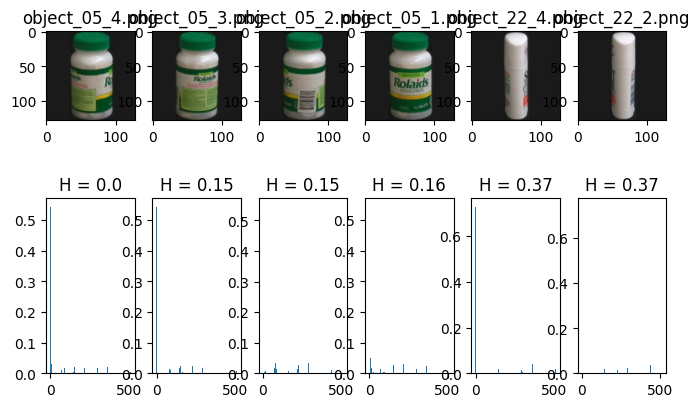

In [38]:
comparingMathod = "H"
sortedHistograms = sorted(histograms.items(), key=lambda a: compare_histograms(imageToCompareHist, a[1], comparingMathod))
display1d(sortedHistograms, comparingMathod)

In [16]:
# comparingMathod = "L2"
# sortedHistograms = sorted(histograms.items(), key=lambda a: compare_histograms(imageToCompareHist, a[1], comparingMathod))
# display1d(sortedHistograms, comparingMathod)

In [15]:
# comparingMathod = "I"
# sortedHistograms = sorted(histograms.items(), key=lambda a: compare_histograms(imageToCompareHist, a[1], comparingMathod))
# display1d(sortedHistograms, comparingMathod)

In [14]:
# comparingMathod = "x^2"
# sortedHistograms = sorted(histograms.items(), key=lambda a: compare_histograms(imageToCompareHist, a[1], comparingMathod))
# display1d(sortedHistograms, comparingMathod)

Question: Which distance is in your opinion best suited for image retrieval? How
does the retrieved sequence change if you use a different number of bins? Is the
execution time affected by the number of bins?

I (biggest variance). Execution time is effected.

### e

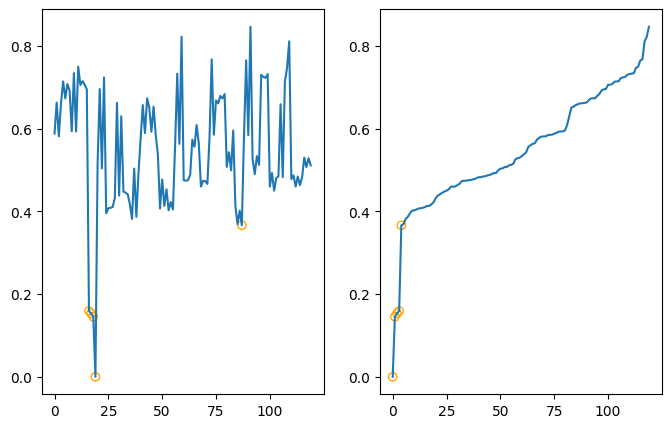

In [118]:

ySorted = np.zeros(len(sortedHistograms))
smallest = np.zeros((5, 2))
for i, data in enumerate(sortedHistograms):
    ySorted[i] = compare_histograms(imageToCompareHist, data[1], comparingMathod)
    if i < 5:
        smallest[i] = [i, ySorted[i]]

y = np.zeros(len(histograms))
smallestNotSorted = np.zeros((5, 2))
index = 0
for i, key in enumerate(histograms):
    y[i] = compare_histograms(imageToCompareHist, histograms[key], "H")
    if y[i] in smallest[:,1]:
        smallestNotSorted[index] = [i, y[i]]
        index+=1

f = plt.figure(figsize=(8, 5))
f.add_subplot(1, 2, 1)
plt.plot(y)
plt.scatter(smallestNotSorted[:,0], smallestNotSorted[:,1], facecolors='none', edgecolors='orange')
# plt.plot(smallestNotSorted[:,0], smallestNotSorted[:,1], "o")
f.add_subplot(1, 2, 2)
plt.plot(ySorted)
plt.scatter(smallest[:,0], smallest[:,1], facecolors='none', edgecolors='orange')
# plt.plot(smallest[:,0], smallest[:,1], "o")
    
plt.show()